### <center><h2> INGENIERÍA EN BIOTECNOLOGÍA</h2></center>
# <center><h1 style="color:red">GBI6 - BIOINFORMÁTICA</h1></center>

<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=200 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Punguil Melissa** 

**05-08-2022**

Basado en las sesiones de control de la versión, estructuras de control, funciones y módulos, pandas , matplotlib y Biopython resuelva el EXAMEN - PYTHON. Utilice los archivos: 

* 2022I_GBI6G01_ExamenPython.ipynb
* miningscience_g01.py

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 

### Datos personales
* Nombre: Melissa Punguil
* Edad: 21 
* Ciudad: Tena


### Características del computador
<table>
  <tr>
    <th>Especificaciones del dispositivo</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Nombre del dispositivo</td>
    <td>DESKTOP-IAK9CAK</td>
  </tr>
    <tr>
    <td>Procesador</td>
    <td>Intel(R) Celeron(R) N4000 CPU @ 1.10GHz   1.10 GHz</td>
  </tr>
     <tr>
    <td>RAM instalada</td>
    <td>4,00 GB (3,78 GB usable)</td>
  </tr>
    <tr>
    <td>Identificador de dispositivo</td>
    <td>30EEFE89-A3F6-4EA7-885D-6C64A052BF60</td>
  </tr>
    <tr>
    <td>Id. del producto</td>
    <td>00329-00000-00003-AA502</td>
  </tr>
    <tr>
    <td>Tipo de sistema</td>
    <td>Sistema operativo de 64 bits, procesador basado en x64</td>
  </tr>
    <tr>
    <td>Lápiz y entrada</td>
    <td>La entrada táctil o manuscrita no está disponible para esta pantalla</td>
  </tr>
</table>

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```science_plots```: la función debe 

- utilizar como argumento de entrada la data descargada por ```download_pubmed```
- ordenar los conteos de autores por país en orden ascedente y 
- seleccionar los cinco más abundantes. Con esta selección debe graficar un ```pie_plot```. Como guía para el conteo por países puede usar el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb). 

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.

In [11]:
import miningscience as msc

help (msc.download_pubmed)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    El siguiente comando permite buscar articulos en pubmed mediante palabras claves




## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [12]:
import os
import re
a = msc.download_pubmed("chicungunya")
b = len (a)
print ('El número artículos para KEYWORD es: ',b)
with open ("Data/chicungunya.txt","w") as txt:
    txt.write(a)

El número artículos para KEYWORD es:  3592


In [13]:
import os
import re
a = msc.download_pubmed("zika")
b = len (a)
print ('El número artículos para KEYWORD es: ',b)
with open ("Data/zika.txt","w") as txt:
    txt.write(a)

El número artículos para KEYWORD es:  2434545


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```science_plots``` para: 

- Visualizar un pie_plot para cada data descargada en el ejercicio 2.
- Guardar los pie_plot en la carpeta ```img```

In [14]:
import matplotlib.pyplot as plt
import numpy as np

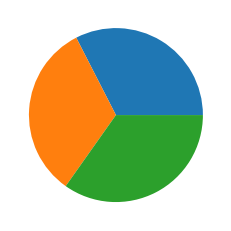

In [15]:
y = np.array([33600413,33733807,35926066])

plt.pie(y)
plt.show()

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

## Ejercicio 5 [2 puntos]

Para algún **gen de las enzimas que intervienen en la ruta metabolica de la gluconeogenesis** ([Lista de genes por tipología](https://www.genome.jp/pathway/map00010+C00068)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [16]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator 
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
from Bio import Phylo
from Bio import Entrez
from Bio import SeqIO
import Bio
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib
import matplotlib.pyplot as plt

with open("data/sequence.seq","r") as archivo:
    b=archivo.read()
    c=b.split('\n')
    a=0
    ListID=[]
    for line in c:
        if a != 15:
            ListID.append(line)
            a=a+1

Entrez.email = "melissa.punguil@est.ikiam.edu.ec" 
ofile=open('Data/SequenceD.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= ListID) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')

ffile=open('Data/SequenceD.fasta','w')
with open("Data/SequenceD.gb",'r') as genbank:
    c=genbank.read()
    for line in c:
        ffile.write(str(line))
        

In [17]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator 
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
from Bio import Phylo
from Bio import Entrez
from Bio import SeqIO
import Bio
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib
import matplotlib.pyplot as plt

with open("Data/sequence(2).seq","r") as archivo:
    b=archivo.read()
    c=b.split('\n')
    a=0
    ListID=[]
    for line in c:
        if a != 15:
            ListID.append(line)
            a=a+1

Entrez.email = "melissa.punguil@est.ikiam.edu.ec" 
ofile=open('Data/SequenceD.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= ListID) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')

ffile=open('Data/SequenceD.fasta','w')
with open("Data/SequenceD.gb",'r') as genbank:
    c=genbank.read()
    for line in c:
        ffile.write(str(line))

clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/SequenceD.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stout,stderr = clustalw_cline()

ClustalAlign = AlignIO.read("Data/SequenceD.aln", "clustal")

calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(ClustalAlign)

constructor = DistanceTreeConstructor(calculator)
Data_tree = constructor.build_tree(ClustalAlign)
Data_tree.rooted = True

Phylo.write(Data_tree, "Data/Data_tree.xml", "phyloxml")

fig = plt.figure(figsize=(20, 25), dpi=200)  
matplotlib.rc('font', size=12)               
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(Data_tree, axes=axes)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/sequence(2).seq'